In [14]:
import pandas as pd
import numpy as np
import irdatacleaning as ird
import islanders as ir
olympic = pd.read_csv("/Users/williammckeon/Downloads/Winter_Olympic_Medals.csv")

In [15]:
olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          409 non-null    int64 
 1   Host_country  409 non-null    object
 2   Host_city     409 non-null    object
 3   Country_Name  409 non-null    object
 4   Country_Code  409 non-null    object
 5   Gold          409 non-null    int64 
 6   Silver        409 non-null    int64 
 7   Bronze        409 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 25.7+ KB


In [16]:
olympic.head()

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
0,1924,France,Chamonix,United States,USA,1,2,1
1,1924,France,Chamonix,Great Britain,GBR,1,1,2
2,1924,France,Chamonix,Austria,AUT,2,1,0
3,1924,France,Chamonix,Norway,NOR,4,7,6
4,1924,France,Chamonix,Finland,FIN,4,4,3


In [17]:
olympic

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
0,1924,France,Chamonix,United States,USA,1,2,1
1,1924,France,Chamonix,Great Britain,GBR,1,1,2
2,1924,France,Chamonix,Austria,AUT,2,1,0
3,1924,France,Chamonix,Norway,NOR,4,7,6
4,1924,France,Chamonix,Finland,FIN,4,4,3
...,...,...,...,...,...,...,...,...
404,2018,South Korea,Pyeongchang,Slovakia,SVK,1,2,0
405,2018,South Korea,Pyeongchang,China,CHN,1,6,2
406,2018,South Korea,Pyeongchang,Hungary,HUN,1,0,0
407,2018,South Korea,Pyeongchang,Poland,POL,1,0,1


In [18]:
olympic.drop(columns = ["Year","Host_country","Host_city","Country_Code"],inplace=True)

In [19]:
new_data = pd.DataFrame(olympic.groupby(by = "Country_Name").sum().sort_values(by = "Gold", ascending =False))

In [20]:
new_data

,Gold,Silver,Bronze
Country_Name,,,
Norway,132,125,111
United States,105,112,88
Germany,92,88,60
Soviet Union,78,57,59
Canada,73,64,62
Austria,64,81,87
Sweden,57,46,55
Switzerland,56,45,52
Russia,47,39,35


In [21]:
gets_gold = []
for i in new_data.Gold:
    if i >0:
        gets_gold.append(1)
    else:
        gets_gold.append(0)

In [22]:
gets_gold

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0]

In [23]:
new_data["gets_gold"] = gets_gold
new_data.drop(columns="Gold", inplace=True)

In [24]:
new_data

,Silver,Bronze,gets_gold
Country_Name,,,
Norway,125,111,1
United States,112,88,1
Germany,88,60,1
Soviet Union,57,59,1
Canada,64,62,1
Austria,81,87,1
Sweden,46,55,1
Switzerland,45,52,1
Russia,39,35,1


In [25]:
new_data.columns

Index(['Silver', 'Bronze', 'gets_gold'], dtype='object')

In [28]:
X = np.array(new_data.iloc[:,:-1].values)

In [29]:
y = np.array(new_data.iloc[:,-1].values)

In [30]:
predict = np.array(new_data.iloc[-5:,:-1].values)

In [32]:
predict

array([[0, 1],
       [1, 1],
       [1, 2],
       [1, 0],
       [3, 1]])

In [73]:
dec = ir.DT(X,y, test_size=0.2)

In [74]:
dt,X_test,y_test = dec.build(test = True)

In [75]:
dt.score(X_test,y_test)

1.0

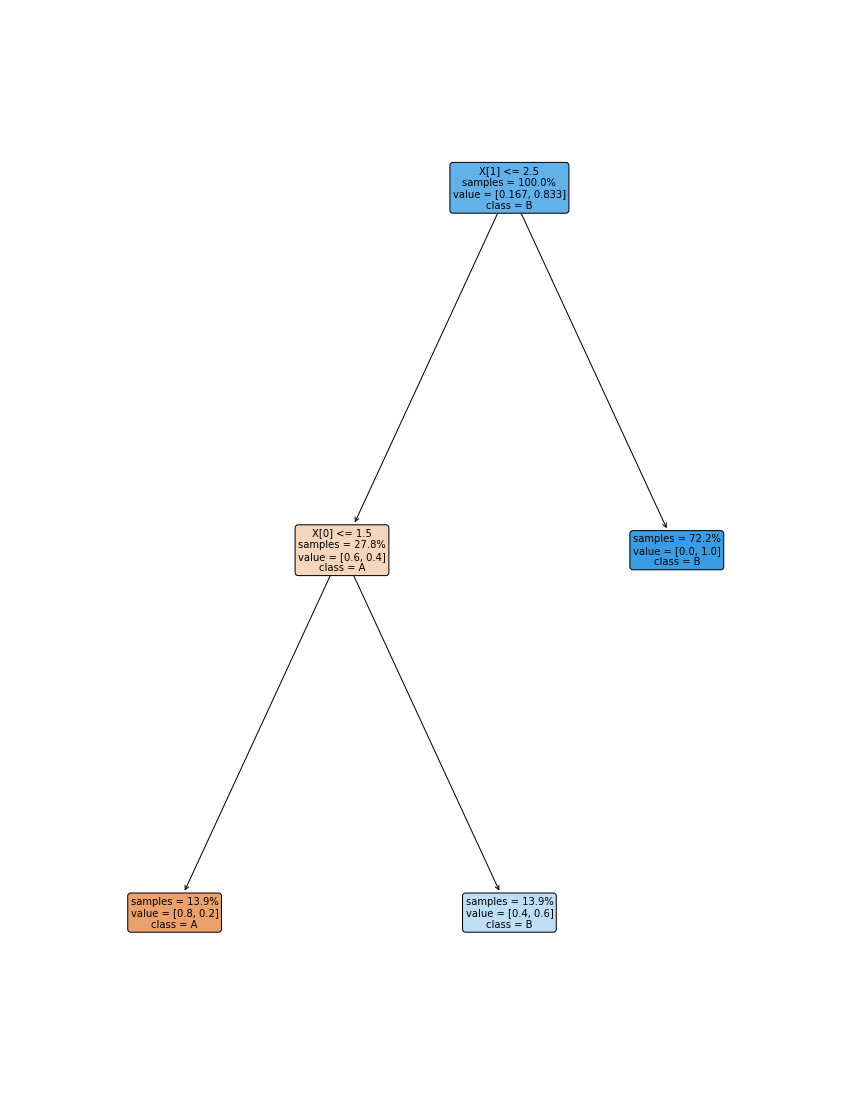

In [76]:
dec.show()

In [79]:
dt.predict_proba(predict)

array([[0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6]])

In [80]:
new_data

,Silver,Bronze,gets_gold
Country_Name,,,
Norway,125,111,1
United States,112,88,1
Germany,88,60,1
Soviet Union,57,59,1
Canada,64,62,1
Austria,81,87,1
Sweden,46,55,1
Switzerland,45,52,1
Russia,39,35,1
